In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
x= np.array([1,2,3,4])
y= np.array([2,2.8,3.6,4.5])

In [4]:
y

array([2. , 2.8, 3.6, 4.5])

In [ ]:
w = 0
b = 0
alpha = 0.01
num_iteration = 20


In [6]:
sse_values = []

#Gradient descent

for i in range(num_iteration):
    
    y_hat = w*x + b
    
    D_w = 2 * np.sum((y_hat -y)*x)####gradient of w 
    D_b = 2 * np.sum(y_hat-y)### gradient of  b 
    
    #Update parameters
    w -= alpha * D_w
    b -= alpha * D_b
    
    #compute sse and store it on sse variable
    sse = (np.sum((y_hat -y)**2))
    sse_values.append(sse)
    
    if (i+1)  % 20 == 0 :
        print(f"iteration {i+1}, SSE: {sse}")
    
    

iteration 20, SSE: 0.2586443145721848


In [7]:

print(f"Optimized parameters: bais = {b}, slop = {w}")

Optimized parameters: bais = 0.5388025938800368, slop = 1.0378816512559883


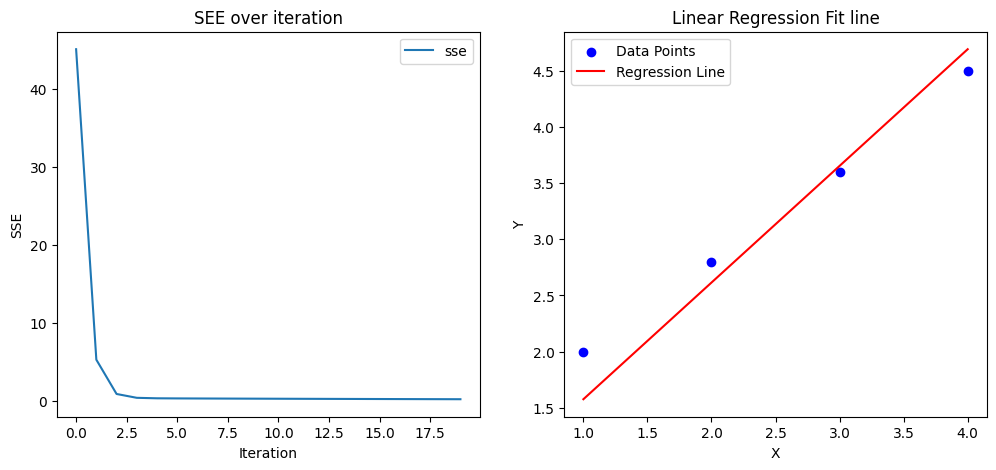

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(num_iteration),sse_values,label='sse')
plt.xlabel("Iteration")
plt.ylabel('SSE')
plt.title('SEE over iteration')
plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.scatter(x,y,color="blue",label='Data Points')
plt.plot(x, b+w*x, color = 'red', label='Regression Line')
plt.xlabel("X")
plt.ylabel('Y')
plt.title("Linear Regression Fit line")
plt.legend()
plt.show()


In [9]:
y=w * x + b
y

array([1.57668425, 2.6145659 , 3.65244755, 4.6903292 ])

np.float64(12.993382408951897)

In [ ]:


class LReg:

    def __init__(self, alpha, num_iterations):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.w = 0
        self.b = 0
        self.sse_values = []
        self.y_hat = None

    def predict(self, x):
        y_hat = self.w * x + self.b
        self.y_hat = y_hat
        return y_hat

    # def gradiant_decent(self, x , y , y_hat):
    #     delta_w = np.mean(y_hat - y)* x
    #     delta_b = np.mean(y_hat - y)

    def gradient_descent(self, x, y, y_hat):
        delta_w = np.mean((y_hat - y) * x)
        delta_b = np.mean(y_hat - y)
        return delta_w, delta_b


        return delta_w , delta_b
    
    def calculate_sse(self, y , y_hat):
        sse = (np.sum((y_hat -y)**2))
        return sse
    
    def fit(self, x , y):

        for i in range(self.num_iterations):
            y_hat = self.predict(x)
            dw,db = self.gradient_descent(x , y , y_hat)

            self.w -= self.alpha * dw
            self.b -= self.alpha * db

            sse = self.calculate_sse(y , y_hat)
            self.sse_values.append(sse)

            if (i+1) % 20 == 0:
                print(f"iteration {i+1}: sse is equal to {sse}")

        return self
 
    def plot(self , x , y):
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(range(self.num_iterations),self.sse_values,label='sse')
        plt.xlabel("Iteration")
        plt.ylabel('SSE')
        plt.title('SEE over iteration')
        plt.legend()
        # plt.show()

        plt.subplot(1,2,2)
        plt.scatter(x,y,color="blue",label='Data Points')
        plt.plot(x, self.predict(x), color='red', label='Regression Line')
        plt.xlabel("Age")
        plt.ylabel('Salary')
        plt.title("Linear Regression Fit line")
        plt.legend()
        plt.show()




In [136]:
df = pd.read_csv('Employee.csv')

df.head()


x = df['Age']
y = df['Salary']

y



# x = np.array([1,2,3,4])
# y = np.array([2,2.2,3.6,4.5])






0       102059
1       157718
2       309964
3       293132
4        49606
         ...  
1465     38508
1466     92995
1467     63375
1468     46521
1469     38258
Name: Salary, Length: 1470, dtype: int64

iteration 20: sse is equal to 32246396627927.79
iteration 40: sse is equal to 30165283242257.625
iteration 60: sse is equal to 28298655138470.45
iteration 80: sse is equal to 26624406803953.023
iteration 100: sse is equal to 25122710988188.82
iteration 120: sse is equal to 23775783898061.48
iteration 140: sse is equal to 22567674592852.22
iteration 160: sse is equal to 21484076084836.36
iteration 180: sse is equal to 20512155908433.152
iteration 200: sse is equal to 19640404151420.004
iteration 220: sse is equal to 18858497148516.96
iteration 240: sse is equal to 18157175223129.54
iteration 260: sse is equal to 17528133029403.352
iteration 280: sse is equal to 16963921195963.86
iteration 300: sse is equal to 16457858106554.602
iteration 320: sse is equal to 16003950772834.174
iteration 340: sse is equal to 15596823862265.996
iteration 360: sse is equal to 15231656040611.988
iteration 380: sse is equal to 14904122875164.604
iteration 400: sse is equal to 14610345622547.242
iteration 420

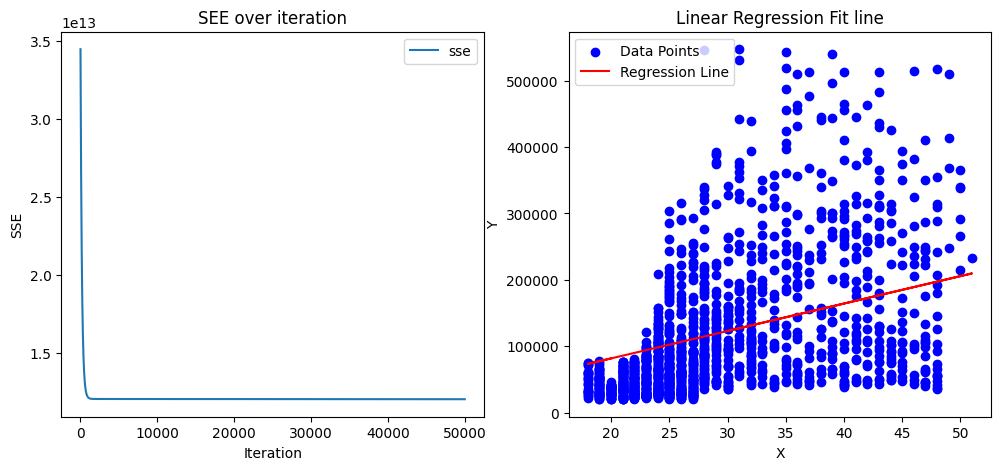

In [149]:


l = LReg(alpha = 0.000003, num_iterations = 50000)
l.fit(x,y)
l.plot(x,y)

In [150]:
print("Final slope (w):", l.w) 
print("Final intercept (b):", l.b)


Final slope (w): 4128.860673915634
Final intercept (b): -768.7388434512098


In [151]:
corr = np.corrcoef(df["Age"], df["Salary"])[0,1] 
print("Correlation between Age and Salary:", corr)

Correlation between Age and Salary: 0.5292271428412809
